In [1]:
import glob,os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
import seaborn as sns
from scipy.stats import *

In [2]:
files = glob.glob('/oak/stanford/groups/mrivas/projects/degas-risk/scorefiles/results/*_center_*201908*.spearmanr.tsv')
print('\n'.join(map(os.path.basename,files)))

all_beta_center_p00001_20190805_500PCs.spearmanr.tsv
all_z_center_p1e-06_20190805_300PCs.spearmanr.tsv
all_z_center_p0001_20190805_100PCs.spearmanr.tsv
all_beta_center_p00001_20190805_300PCs.spearmanr.tsv
all_beta_center_p1e-05_20190805_500PCs.spearmanr.tsv
all_beta_center_p0001_20190805_100PCs.spearmanr.tsv
all_z_center_p0001_20190805_500PCs.spearmanr.tsv
all_z_center_p1e-05_20190805_300PCs.spearmanr.tsv
all_z_center_p0001_20190805_300PCs.spearmanr.tsv
all_z_center_p1e-06_20190805_100PCs.spearmanr.tsv
all_z_center_p001_20190805_500PCs.spearmanr.tsv
all_z_center_p001_20190805_100PCs.spearmanr.tsv
all_beta_center_p0001_20190805_500PCs.spearmanr.tsv
all_beta_center_p0001_20190805_300PCs.spearmanr.tsv
all_beta_center_p1e-06_20190805_100PCs.spearmanr.tsv
all_z_center_p00001_20190805_300PCs.spearmanr.tsv
all_beta_center_p1e-06_20190805_500PCs.spearmanr.tsv
all_z_center_p1e-05_20190805_500PCs.spearmanr.tsv
all_beta_center_p1e-05_20190805_300PCs.spearmanr.tsv
all_z_center_p00001_20190805_100P

In [3]:
kind='RAW'
datas = dict([(os.path.basename(f)[4:-14].replace('_20190805','').replace('_center','').replace('Cs','C'),
               pd.read_table(f, index_col=0, usecols=['PHE','TRAIN_'+kind,'TEST_'+kind])) for f in files])

In [4]:
train=pd.DataFrame([datas[ds]['TRAIN_'+kind] for ds in datas], 
                    index=[ds for ds in datas]).T
train.head()

,beta_p0001_100PC,beta_p1e-06_500PC,beta_p001_500PC,z_p00001_100PC,z_p00001_500PC,z_p1e-05_500PC,beta_p0001_300PC,z_p1e-06_300PC,z_p001_100PC,z_p1e-05_300PC,...,beta_p00001_300PC,beta_p001_100PC,beta_p1e-05_100PC,beta_p1e-05_300PC,beta_p1e-06_300PC,z_p0001_300PC,z_p001_500PC,z_p1e-05_100PC,z_p00001_300PC,beta_p001_300PC
BIN10030500,0.022940,0.005888,0.234133,-0.010599,-0.013576,-0.010876,0.025447,0.002508,0.022258,-0.011065,...,0.013465,0.040911,-0.010207,0.001375,0.007700,0.010008,0.117589,-0.010630,-0.013529,0.227378
BIN10030510,0.024600,-0.003601,0.232484,-0.006428,-0.008394,-0.007416,0.029344,-0.003768,0.021988,-0.006573,...,0.013623,0.040738,-0.002043,0.010516,0.002089,0.004744,0.105639,-0.010089,-0.008128,0.226380
BIN10030800,0.007192,0.026595,0.046213,0.004985,0.028990,0.011706,0.022336,0.015524,0.024552,0.010974,...,0.019072,0.025161,0.004011,0.013848,0.014390,0.022739,0.035107,0.000337,0.017690,0.038888
BIN10030820,0.034058,0.045357,0.073189,0.030486,0.032903,0.031726,0.037886,0.032556,0.030299,0.030609,...,0.037132,0.036971,0.030165,0.036707,0.038265,0.031636,0.030729,0.029754,0.031920,0.040366
BIN1020483,0.001413,NaN,0.137329,-0.002793,-0.000334,0.001308,0.000926,NaN,0.006943,0.002379,...,-0.006248,0.086451,0.000609,-0.002515,NaN,0.000672,0.027146,0.001637,0.000137,0.079546


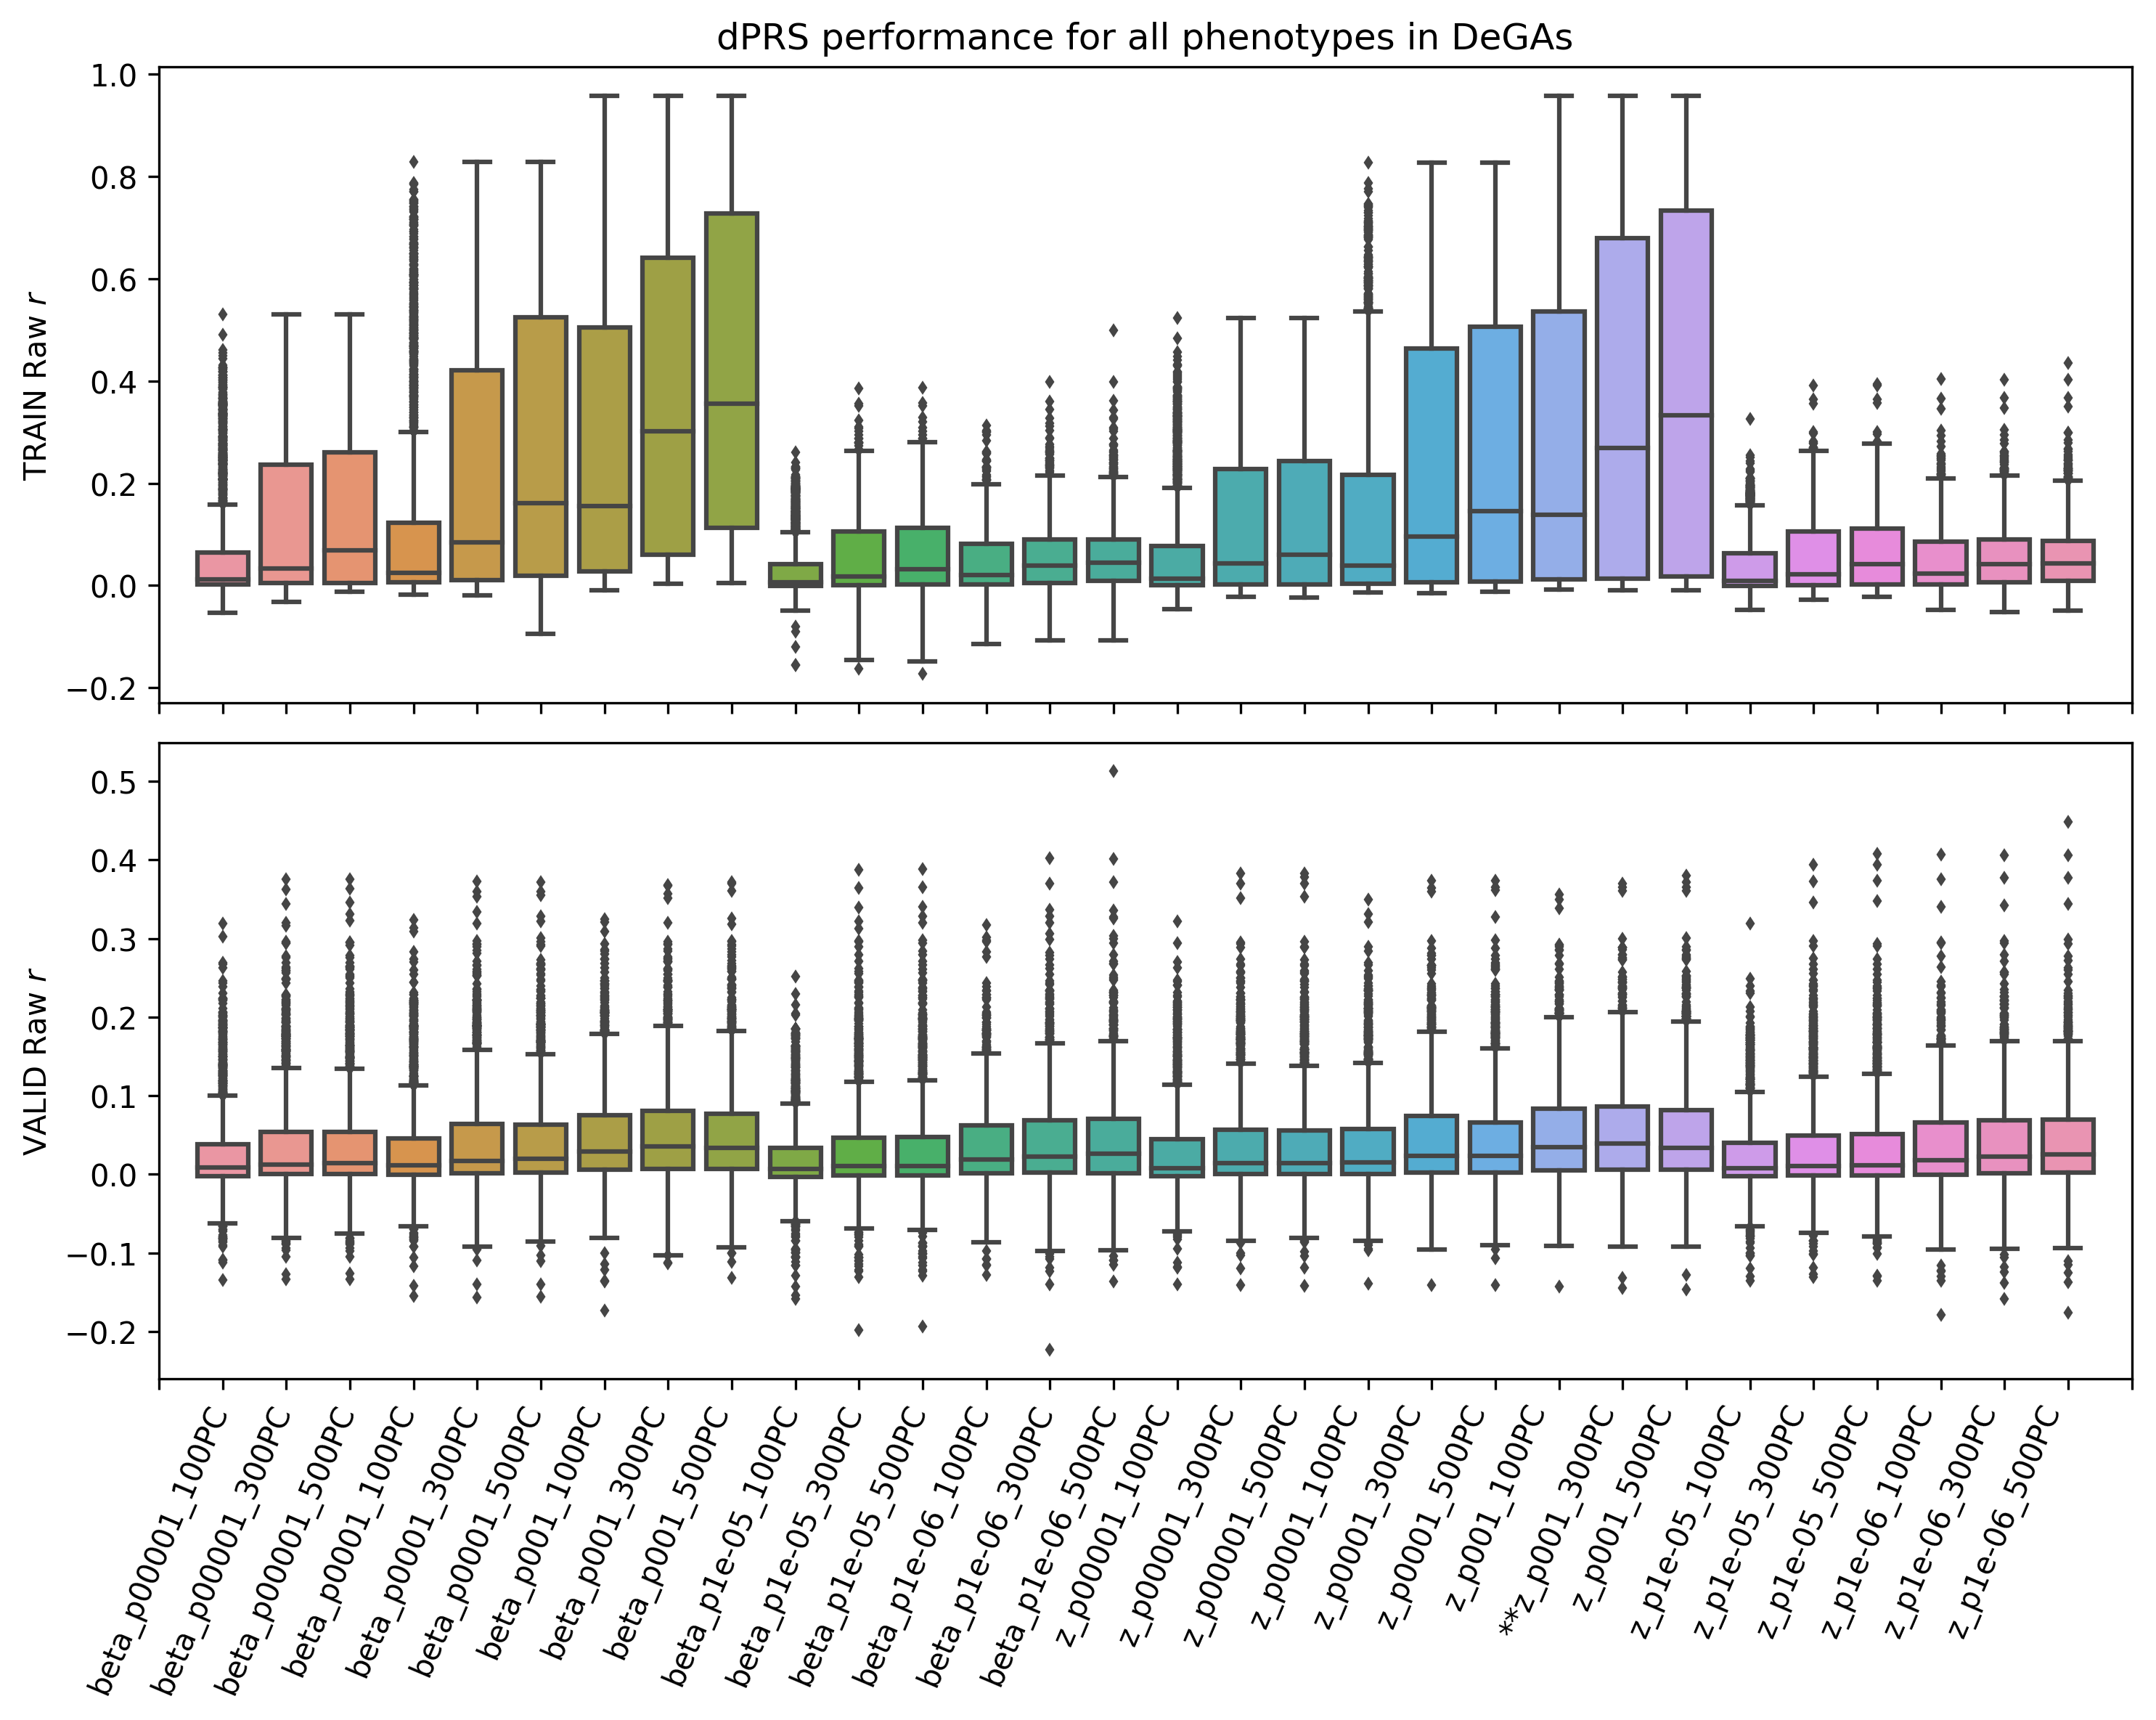

In [37]:
fig=plt.figure(figsize=(10,8),dpi=300)

# train
ax=plt.subplot(211)
sns.boxplot(x='dataset',y='rsq',
            data=train.melt(var_name='dataset',value_name='rsq').sort_values('dataset'),
            fliersize=2, ax=ax)
ax.set_xticks(list(range(-1,len(files)+1)))
ax.set_xticklabels(['' for _ in ax.get_xticklabels()])
ax.set_xlabel('')
ax.set_ylabel(' '.join(['TRAIN',kind.lower().capitalize(),'$r$']))
plt.title('dPRS performance for all phenotypes in DeGAs')

# valid
ax=plt.subplot(212)
sns.boxplot(x='dataset',y='rsq',
            data=test.melt(var_name='dataset',value_name='rsq').sort_values('dataset'),
            fliersize=2, ax=ax)
            #showfliers=0, ax=ax)
ax.set_xticks(list(range(-1,len(files)+1)))
ax.set_xticklabels(map(lambda s:'**'+s if s=='z_p001_300PC' else s, 
                       map(lambda i:str(i.get_text()), ax.get_xticklabels())), rotation=67)
ax.set_xlabel('')
ax.set_ylabel(' '.join(['VALID',kind.lower().capitalize(),'$r$']))
fig.tight_layout()
plt.show()

In [6]:
test=pd.DataFrame([datas[ds]['TEST_'+kind] for ds in datas], 
                 index=[ds for ds in datas]).T
test.head()

,beta_p0001_100PC,beta_p1e-06_500PC,beta_p001_500PC,z_p00001_100PC,z_p00001_500PC,z_p1e-05_500PC,beta_p0001_300PC,z_p1e-06_300PC,z_p001_100PC,z_p1e-05_300PC,...,beta_p00001_300PC,beta_p001_100PC,beta_p1e-05_100PC,beta_p1e-05_300PC,beta_p1e-06_300PC,z_p0001_300PC,z_p001_500PC,z_p1e-05_100PC,z_p00001_300PC,beta_p001_300PC
BIN10030500,0.014865,0.004302,0.033226,-0.006116,-0.009571,-0.008347,0.011042,0.005483,0.017223,-0.008465,...,0.015002,0.016608,-0.007926,0.009977,0.010421,0.009863,0.020570,-0.010472,-0.009233,0.032636
BIN10030510,0.015349,0.000791,0.027605,0.003276,-0.004087,0.005213,0.013479,0.011165,0.014999,0.007271,...,0.011497,0.010938,0.002027,0.015476,0.019071,0.007537,0.014477,-0.012719,-0.002934,0.027808
BIN10030800,-0.007426,0.015923,0.009901,-0.001308,0.013527,0.007702,0.007041,0.004711,0.008219,0.006434,...,0.009668,0.004501,0.007887,0.010672,-0.005896,0.008056,0.011928,-0.004074,0.006938,0.001576
BIN10030820,0.037786,0.045832,0.044172,0.033535,0.036786,0.034046,0.039703,0.035104,0.034096,0.033848,...,0.039803,0.037484,0.034428,0.039555,0.039136,0.036939,0.034251,0.033513,0.035756,0.035819
BIN1020483,0.005464,NaN,0.014995,-0.007330,0.002209,0.004254,0.007457,NaN,0.003113,0.004902,...,-0.008336,0.012825,0.008508,-0.000799,NaN,0.000573,0.000575,-0.004348,0.002643,0.014517


In [8]:
test.mean().sort_values()[::-1]

z_p001_300PC         0.054072
z_p001_100PC         0.052555
beta_p001_300PC      0.051728
z_p001_500PC         0.051601
beta_p001_500PC      0.050188
beta_p001_100PC      0.046909
z_p0001_300PC        0.045567
beta_p1e-06_500PC    0.045048
z_p1e-06_500PC       0.044349
z_p0001_500PC        0.043013
z_p1e-06_300PC       0.042472
beta_p1e-06_300PC    0.042122
beta_p0001_500PC     0.040793
beta_p0001_300PC     0.039961
z_p1e-06_100PC       0.037457
z_p0001_100PC        0.037180
z_p00001_300PC       0.036505
beta_p1e-06_100PC    0.036247
z_p00001_500PC       0.036003
beta_p00001_300PC    0.035282
beta_p00001_500PC    0.035094
beta_p0001_100PC     0.032358
z_p1e-05_500PC       0.032032
z_p1e-05_300PC       0.031274
beta_p1e-05_500PC    0.031180
beta_p1e-05_300PC    0.030564
z_p00001_100PC       0.028623
beta_p00001_100PC    0.027157
z_p1e-05_100PC       0.024533
beta_p1e-05_100PC    0.020086
dtype: float64

In [9]:
wilcoxon(test[test.mean().sort_values()[::-1].index[0]], 
         test[test.mean().sort_values()[::-1].index[1]])

/home/users/magu/.local/lib/python2.7/site-packages/scipy/stats/morestats.py:2400: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
/home/users/magu/.local/lib/python2.7/site-packages/scipy/stats/morestats.py:2401: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


WilcoxonResult(statistic=853643.0, pvalue=2.8987563060846863e-07)

In [10]:
datas['z_p001_300PC'].sort_values('TRAIN_'+kind).dropna()[::-1].head()

,TRAIN_RAW,TEST_RAW
PHE,,
INI22401,0.957794,0.085422
INI22400,0.938237,0.084034
INI23278,0.932544,-0.079319
INI6183,0.923663,-0.081295
INI22410,0.921140,-0.060029


In [11]:
datas['z_p001_300PC'].sort_values('TEST_'+kind).dropna()[::-1].head()

,TRAIN_RAW,TEST_RAW
PHE,,
INI30100,0.423130,0.369894
INI10030840,0.404506,0.365183
INI20030660,0.406486,0.360431
QT_FC1001717,0.334534,0.299742
INI20030760,0.384304,0.288944


In [12]:
pd.DataFrame([datas[d].loc['INI21001',:] for d in datas], index=[d for d in datas]).sort_values('TEST_'+kind)[::-1]

,TRAIN_RAW,TEST_RAW
beta_p001_100PC,0.402849,0.222810
beta_p001_500PC,0.382799,0.212731
beta_p001_300PC,0.379386,0.210147
z_p001_100PC,0.346214,0.209957
z_p001_500PC,0.340182,0.206987
z_p001_300PC,0.339509,0.206272
beta_p0001_100PC,0.286498,0.191554
z_p0001_100PC,0.247636,0.171816
beta_p0001_500PC,0.260122,0.168742
beta_p00001_100PC,0.226322,0.168135


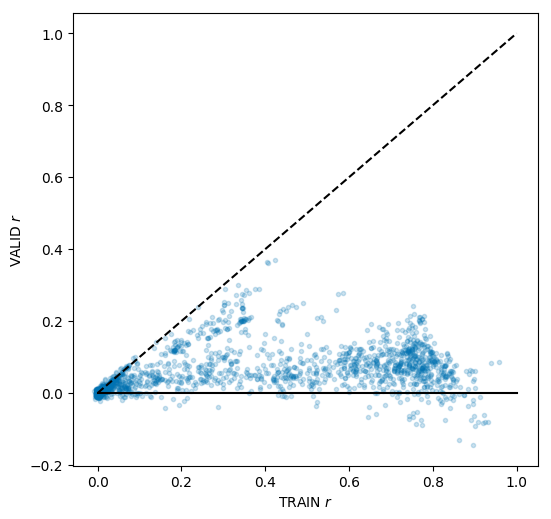

In [13]:
plt.figure(figsize=(6,6), dpi=100)
plt.plot(datas['z_p001_300PC']['TRAIN_'+kind], 
         datas['z_p001_300PC']['TEST_'+kind], '.', alpha=0.2)
plt.plot([0,1],[0,1],'k--')
plt.plot([0,1],[0,0],'k-')
plt.xlabel('TRAIN '+'$r$'), plt.ylabel('VALID '+'$r$')
plt.show()

In [14]:
npzs = glob.glob('/oak/stanford/groups/mrivas/projects/degas-risk/datasets/train/tsvd/*20190805*.npz')
print('\n'.join(map(os.path.basename,npzs)))

all_beta_center_p1e-06_20190805_500PCs.npz
all_z_center_p00001_20190805_500PCs.npz
all_beta_center_p00001_20190805_500PCs.npz
all_beta_center_p001_20190805_500PCs.npz
all_z_center_p1e-06_20190805_500PCs.npz
all_z_center_p0001_20190805_500PCs.npz
all_z_center_p1e-05_20190805_500PCs.npz
all_beta_center_p1e-05_20190805_500PCs.npz
all_beta_center_p0001_20190805_500PCs.npz
all_z_center_p001_20190805_500PCs.npz


In [15]:
for npz in npzs:
    continue
    z=np.load(npz)
    plt.figure(figsize=(12,4), dpi=300)
    plt.plot(np.arange(z['D'].shape[0]), z['variance_explained_ratio'], '.')
    plt.xticks(np.arange(0,z['D'].shape[0],20))
    plt.xlabel('PC'),plt.ylabel('Variance explained')
    # plt.plot([0,z['D'].shape[0]],[1.0/z['V'].shape[0],1.0/z['V'].shape[0]], 'k--')
    plt.legend([os.path.splitext(os.path.basename(npz))[0][4:-16]]) #, 'Isotropic variance'])
    plt.show()